<img width=500px; src="img/logoUPSayPlusCDS_990.png">

<p style="margin-top: 3em;"><b><big><big><big><big>Introduction to Pandas</big></big></big></big></b></p>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

# 1. Let's start with a showcase

#### Case 1: titanic survival data

In [2]:
df = pd.read_csv("data/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

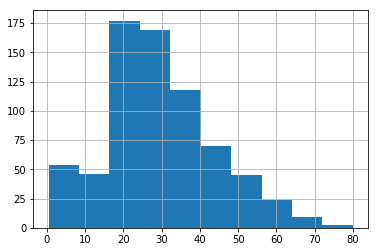

In [4]:
df['Age'].hist()

**How does the survival rate of the passengers differ between sexes?**

In [5]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


**Or how does it differ between the different classes?**

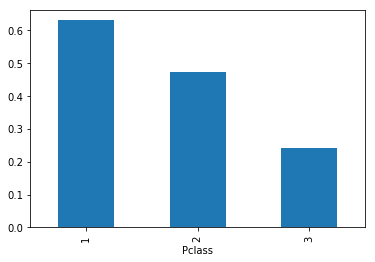

In [6]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

All the needed functionality for the above examples will be explained throughout this tutorial.

#### Case 2: air quality measurement timeseries

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe

Starting from these hourly data for different stations:

In [7]:
data = pd.read_csv('data/airbase_data.csv', index_col=0, parse_dates=True, na_values=[-9999])

In [8]:
data.head()

,BETR801,BETN029,FR04037,FR04012
1998-01-01 00:00:00,NaN,16.0,NaN,NaN
1998-01-01 01:00:00,NaN,13.0,NaN,NaN
1998-01-01 02:00:00,NaN,12.0,NaN,NaN
1998-01-01 03:00:00,NaN,12.0,NaN,NaN
1998-01-01 04:00:00,NaN,11.0,NaN,NaN


to answering questions about this data in a few lines of code:

**Does the air pollution show a decreasing trend over the years?**

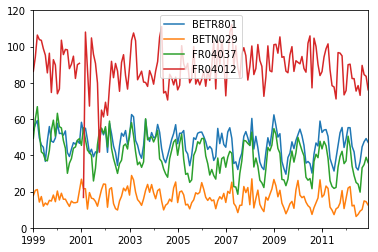

In [9]:
data['1999':].resample('M').mean().plot(ylim=[0,120])

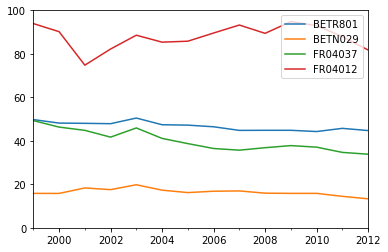

In [10]:
data['1999':].resample('A').mean().plot(ylim=[0,100])

**What is the difference in diurnal profile between weekdays and weekend?**

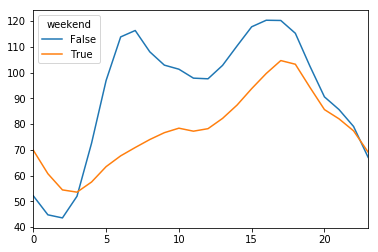

In [11]:
data['weekday'] = data.index.weekday
data['weekend'] = data['weekday'].isin([5, 6])
data_weekend = data.groupby(['weekend', data.index.hour])['FR04012'].mean().unstack(level=0)
data_weekend.plot()

We will come back to these example, and build them up step by step.

# 2. The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


<img align="left" width=50% src="img/schema-dataframe.svg">

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df.index

RangeIndex(start=0, stop=891, step=1)

One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [15]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [16]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [17]:
countries.columns

Index(['area', 'capital', 'country', 'population'], dtype='object')

To check the data types of the different columns:

In [18]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

An overview of that information can be given with the `info()` method:

In [19]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [20]:
countries.values

array([[30510, 'Brussels', 'Belgium', 11.3],
       [671308, 'Paris', 'France', 64.3],
       [357050, 'Berlin', 'Germany', 81.3],
       [41526, 'Amsterdam', 'Netherlands', 16.9],
       [244820, 'London', 'United Kingdom', 64.9]], dtype=object)

## One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [21]:
countries['population']

0    11.3
1    64.3
2    81.3
3    16.9
4    64.9
Name: population, dtype: float64

In [23]:
population = countries['population']

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [24]:
population.index

RangeIndex(start=0, stop=5, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [25]:
population.values

array([ 11.3,  64.3,  81.3,  16.9,  64.9])

We can access series values via the index, just like for NumPy arrays:

In [26]:
population[0]

11.300000000000001

Unlike the NumPy array, though, this index can be something other than integers:

In [27]:
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


In [28]:
population = countries['population']
population

country
Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
Name: population, dtype: float64

In [29]:
population['France']

64.299999999999997

but with the power of numpy arrays:

In [30]:
population * 1000

country
Belgium           11300.0
France            64300.0
Germany           81300.0
Netherlands       16900.0
United Kingdom    64900.0
Name: population, dtype: float64

We can index or slice the populations as expected:

In [31]:
population['Belgium']

11.300000000000001

In [32]:
population['Belgium':'Germany']

country
Belgium    11.3
France     64.3
Germany    81.3
Name: population, dtype: float64

Many things you can do with numpy arrays, can also be applied on objects.

Fancy indexing, like indexing with a list or boolean indexing:

In [33]:
population[['France', 'Netherlands']]

country
France         64.3
Netherlands    16.9
Name: population, dtype: float64

In [34]:
population[population > 20]

country
France            64.3
Germany           81.3
United Kingdom    64.9
Name: population, dtype: float64

Element-wise operations:

In [35]:
population / 100

country
Belgium           0.113
France            0.643
Germany           0.813
Netherlands       0.169
United Kingdom    0.649
Name: population, dtype: float64

A range of methods:

In [36]:
population.mean()

47.739999999999995

### Alignment!

Only, pay attention to **alignment**: operations between series will align on the index:  

In [22]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [23]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [24]:
s2

France     64.3
Germany    81.3
dtype: float64

In [25]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.

Let's compute density of each country:

In [34]:
countries['population']*1000000 / countries['area']

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

Adding a new column to the dataframe is very simple:

In [35]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944
United Kingdom,244820,London,64.9,265.092721


We can use masking to select certain data:

In [36]:
countries[countries['density'] > 300]

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
Netherlands,41526,Amsterdam,16.9,406.973944


And we can do things like sorting the items in the array, and indexing to take the first two rows:

In [37]:
countries.sort_index(by='density', ascending=False)

,area,capital,population,density
country,,,,
Netherlands,41526,Amsterdam,16.9,406.973944
Belgium,30510,Brussels,11.3,370.370370
United Kingdom,244820,London,64.9,265.092721
Germany,357050,Berlin,81.3,227.699202
France,671308,Paris,64.3,95.783158


# 3. Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

In [ ]:
pd.read

In [ ]:
df.to

Very powerful csv reader:

In [25]:
pd.read_csv?

Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [37]:
df = pd.read_csv("data/titanic.csv")

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
no2 = pd.read_csv('data/airbase_data.csv', index_col=0, parse_dates=True, na_values=[-9999])

In [40]:
no2

,BETR801,BETN029,FR04037,FR04012
1998-01-01 00:00:00,NaN,16.0,NaN,NaN
1998-01-01 01:00:00,NaN,13.0,NaN,NaN
1998-01-01 02:00:00,NaN,12.0,NaN,NaN
1998-01-01 03:00:00,NaN,12.0,NaN,NaN
1998-01-01 04:00:00,NaN,11.0,NaN,NaN
...,...,...,...,...
2012-12-31 19:00:00,21.0,2.5,28.0,67.0
2012-12-31 20:00:00,16.5,2.0,16.0,47.0
2012-12-31 21:00:00,14.5,2.5,13.0,43.0
2012-12-31 22:00:00,16.5,3.5,14.0,42.0


# 4. Exploration

Some useful methods:

`head` and `tail`

In [41]:
no2.head(3)

,BETR801,BETN029,FR04037,FR04012
1998-01-01 00:00:00,NaN,16.0,NaN,NaN
1998-01-01 01:00:00,NaN,13.0,NaN,NaN
1998-01-01 02:00:00,NaN,12.0,NaN,NaN


In [42]:
no2.tail()

,BETR801,BETN029,FR04037,FR04012
2012-12-31 19:00:00,21.0,2.5,28.0,67.0
2012-12-31 20:00:00,16.5,2.0,16.0,47.0
2012-12-31 21:00:00,14.5,2.5,13.0,43.0
2012-12-31 22:00:00,16.5,3.5,14.0,42.0
2012-12-31 23:00:00,15.0,3.0,13.0,49.0


`info()`

In [43]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131265 entries, 1998-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
BETR801    113252 non-null float64
BETN029    119703 non-null float64
FR04037    120384 non-null float64
FR04012    119448 non-null float64
dtypes: float64(4)
memory usage: 5.0 MB


Getting some basic summary statistics about the data with `describe`:

In [44]:
no2.describe()

,BETR801,BETN029,FR04037,FR04012
count,113252.000000,119703.000000,120384.000000,119448.000000
mean,47.049302,16.542171,40.040005,87.993261
std,21.733629,12.446040,23.024347,41.317684
min,1.000000,1.000000,0.000000,0.000000
25%,31.000000,7.000000,23.000000,61.000000
50%,45.000000,12.000000,37.000000,88.000000
75%,60.000000,23.000000,54.000000,115.000000
max,339.000000,105.000000,256.000000,358.000000


Quickly visualizing the data

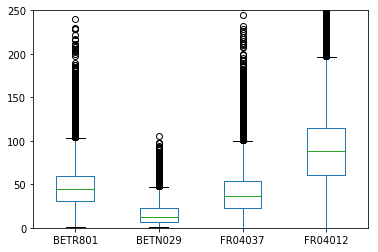

In [46]:
no2.plot(kind='box', ylim=[0,250])

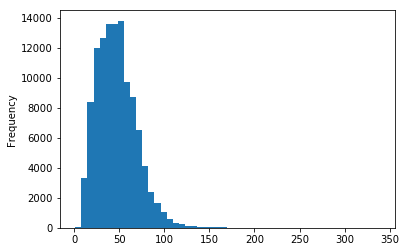

In [47]:
no2['BETR801'].plot(kind='hist', bins=50)

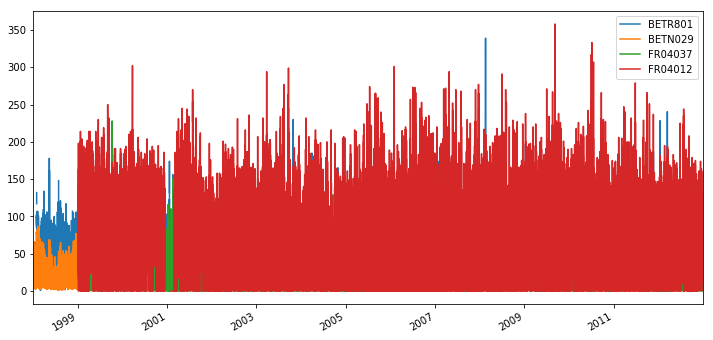

In [48]:
no2.plot(figsize=(12,6))

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

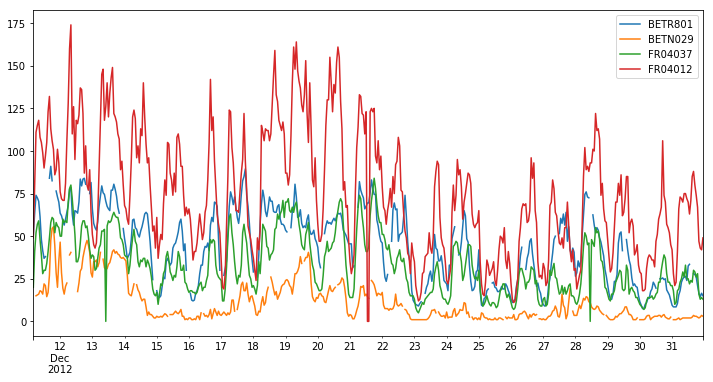

In [49]:
no2[-500:].plot(figsize=(12,6))

Or we can use some more advanced time series features -> see further in this notebook!

# 5. Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

In [55]:
# redefining the example objects

# series
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data).set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [56]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

or multiple columns:

In [57]:
countries[['area', 'capital']]

,area,capital
country,,
Belgium,30510,Brussels
France,671308,Paris
Germany,357050,Berlin
Netherlands,41526,Amsterdam
United Kingdom,244820,London


But, slicing accesses the rows:

In [58]:
countries['France':'Netherlands']

,area,capital,population
country,,,
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9


When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [59]:
countries.loc['Germany', 'area']

357050

In [60]:
countries.loc['France':'Germany', :]

,area,capital,population
country,,,
France,671308,Paris,64.3
Germany,357050,Berlin,81.3


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [61]:
countries.iloc[0:2,1:3]

,capital,population
country,,
Belgium,Brussels,11.3
France,Paris,64.3


The different indexing methods can also be used to assign data:

In [62]:
countries.loc['Belgium':'Germany', 'population'] = 10

In [63]:
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,10.0
France,671308,Paris,10.0
Germany,357050,Berlin,10.0
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [64]:
countries['area'] > 100000

country
Belgium           False
France             True
Germany            True
Netherlands       False
United Kingdom     True
Name: area, dtype: bool

In [65]:
countries[countries['area'] > 100000]

,area,capital,population
country,,,
France,671308,Paris,10.0
Germany,357050,Berlin,10.0
United Kingdom,244820,London,64.9


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

In [66]:
df = pd.read_csv("data/titanic.csv")

In [68]:
df[df['Sex'] == 'male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
df.loc[df['Sex'] == 'male', 'Age'].mean()

30.72664459161148

In [70]:
df.loc[df['Sex'] == 'female', 'Age'].mean()

27.915708812260537

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
</ul>
</div>

In [72]:
len(df[df['Age'] > 70])

5

In [73]:
(df['Age'] > 70).sum()

5

# 6. The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [74]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
4,10,B
5,15,C
6,10,A
7,15,B
8,20,C


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [75]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [76]:
print('A', df[df['key'] == "A"]['data'].sum())
print('B', df[df['key'] == "B"]['data'].sum())
print('C', df[df['key'] == "C"]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [77]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [78]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


And many more methods are available. 

In [79]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

### Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [80]:
df = pd.read_csv("data/titanic.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**How does the survival rate of the passengers differ between sexes?**

In [81]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.742038
male,0.188908


**Or how does it differ between the different classes?**

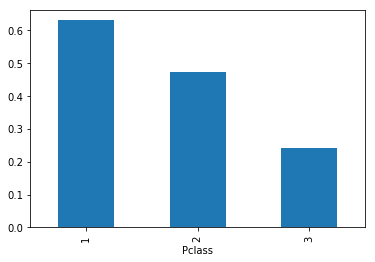

In [82]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Using groupby(), calculate the average age for each sex.</li>
</ul>
</div>

In [83]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [84]:
# df['Survived'].sum() / len(df['Survived'])
df['Survived'].mean()

0.3838383838383838

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [85]:
df25 = df[df['Age'] <= 25]
df25['Survived'].sum() / len(df25['Survived'])

0.4119601328903654

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

In [86]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.</li>
</ul>
</div>

In [89]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

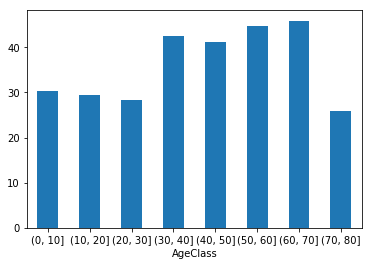

In [90]:
df.groupby('AgeClass')['Fare'].mean().plot(kind='bar', rot=0)

# 7. Working with time series data

In [91]:
no2 = pd.read_csv('data/airbase_data.csv', index_col=0, parse_dates=True, na_values=[-9999])

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [92]:
no2.index

DatetimeIndex(['1998-01-01 00:00:00', '1998-01-01 01:00:00',
               '1998-01-01 02:00:00', '1998-01-01 03:00:00',
               '1998-01-01 04:00:00', '1998-01-01 05:00:00',
               '1998-01-01 06:00:00', '1998-01-01 07:00:00',
               '1998-01-01 08:00:00', '1998-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=131265, freq=None)

Indexing a time series works with strings:

In [93]:
no2["2010-01-01 09:00": "2010-01-01 12:00"]

,BETR801,BETN029,FR04037,FR04012
2010-01-01 09:00:00,17.0,7.0,19.0,41.0
2010-01-01 10:00:00,18.0,5.0,21.0,48.0
2010-01-01 11:00:00,17.0,4.0,23.0,63.0
2010-01-01 12:00:00,18.0,4.0,22.0,57.0


A nice feature is "partial string" indexing, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2012:

In [94]:
no2['2012']

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21.0,1.0,17.0,56.0
2012-01-01 01:00:00,18.0,1.0,16.0,50.0
2012-01-01 02:00:00,20.0,1.0,14.0,46.0
2012-01-01 03:00:00,16.0,1.0,17.0,47.0
2012-01-01 04:00:00,13.0,1.0,18.0,45.0
...,...,...,...,...
2012-12-31 19:00:00,21.0,2.5,28.0,67.0
2012-12-31 20:00:00,16.5,2.0,16.0,47.0
2012-12-31 21:00:00,14.5,2.5,13.0,43.0
2012-12-31 22:00:00,16.5,3.5,14.0,42.0


Or all data of January up to March 2012:

In [95]:
no2['2012-01':'2012-03']

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21.0,1.0,17.0,56.0
2012-01-01 01:00:00,18.0,1.0,16.0,50.0
2012-01-01 02:00:00,20.0,1.0,14.0,46.0
2012-01-01 03:00:00,16.0,1.0,17.0,47.0
2012-01-01 04:00:00,13.0,1.0,18.0,45.0
...,...,...,...,...
2012-03-31 19:00:00,30.5,6.0,22.0,61.0
2012-03-31 20:00:00,38.0,6.0,19.0,46.0
2012-03-31 21:00:00,36.0,8.0,17.0,56.0
2012-03-31 22:00:00,34.0,8.0,18.0,59.0


Time and date components can be accessed from the index:

In [96]:
no2.index.hour

array([ 0,  1,  2, ..., 21, 22, 23], dtype=int32)

In [97]:
no2.index.year

array([1998, 1998, 1998, ..., 2012, 2012, 2012], dtype=int32)

## The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

Remember the air quality data:

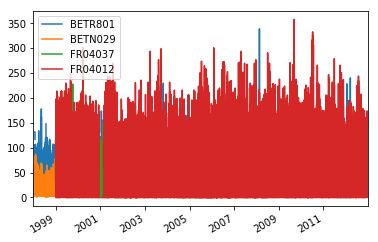

In [98]:
no2.plot()

The time series has a frequency of 1 hour. I want to change this to daily:

In [99]:
no2.head()

,BETR801,BETN029,FR04037,FR04012
1998-01-01 00:00:00,NaN,16.0,NaN,NaN
1998-01-01 01:00:00,NaN,13.0,NaN,NaN
1998-01-01 02:00:00,NaN,12.0,NaN,NaN
1998-01-01 03:00:00,NaN,12.0,NaN,NaN
1998-01-01 04:00:00,NaN,11.0,NaN,NaN


In [100]:
no2.resample('D').mean().head()

,BETR801,BETN029,FR04037,FR04012
1998-01-01,NaN,8.545455,NaN,NaN
1998-01-02,NaN,7.545455,NaN,NaN
1998-01-03,NaN,5.090909,NaN,NaN
1998-01-04,NaN,5.136364,NaN,NaN
1998-01-05,NaN,8.181818,NaN,NaN


Above I take the mean, but as with `groupby` I can also specify other methods:

In [101]:
no2.resample('D').max().head()

,BETR801,BETN029,FR04037,FR04012
1998-01-01,NaN,16.0,NaN,NaN
1998-01-02,NaN,23.0,NaN,NaN
1998-01-03,NaN,9.0,NaN,NaN
1998-01-04,NaN,7.0,NaN,NaN
1998-01-05,NaN,35.0,NaN,NaN


The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

Further exploring the data:

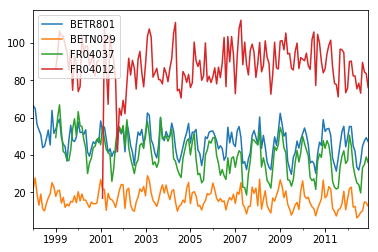

In [102]:
no2.resample('M').mean().plot() # 'A'

In [103]:
# no2['2012'].resample('D').plot()

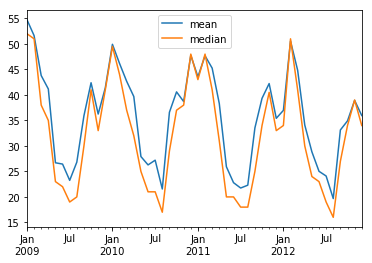

In [104]:
no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()

#### Question: The evolution of the yearly averages with, and the overall mean of all stations

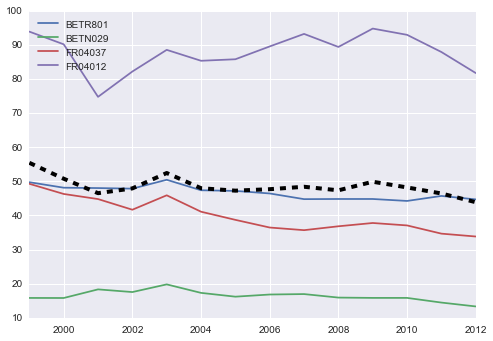

In [81]:
no2_1999 = no2['1999':]
no2_1999.resample('A').plot()
no2_1999.mean(axis=1).resample('A').plot(color='k', linestyle='--', linewidth=4)

**Question: how does the *typical monthly profile* look like for the different stations?**

First, we add a column to the dataframe that indicates the month (integer value of 1 to 12):

In [85]:
no2['month'] = no2.index.month

Now, we can calculate the mean of each month over the different years:

In [86]:
no2.groupby('month').mean()

,BETR801,BETN029,FR04037,FR04012
month,,,,
1,50.927088,20.304075,47.634409,82.472813
2,54.168021,19.938929,50.564499,83.973207
3,54.598322,19.424205,47.862715,96.272138
4,51.491741,18.183433,40.943117,95.962862
...,...,...,...,...
9,49.220250,14.605979,39.706019,93.000316
10,50.894911,17.660149,44.010934,86.297836
11,50.254468,19.372193,45.564683,87.173878
12,48.644117,21.007089,45.262243,81.817977


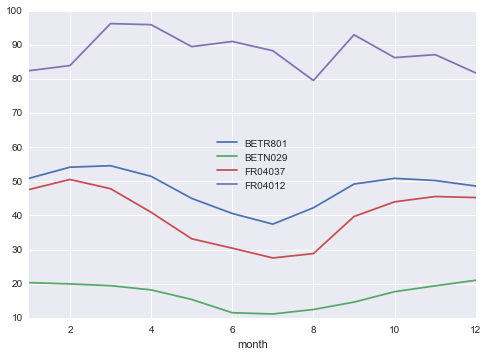

In [87]:
no2.groupby('month').mean().plot()

#### Question: The typical diurnal profile for the different stations

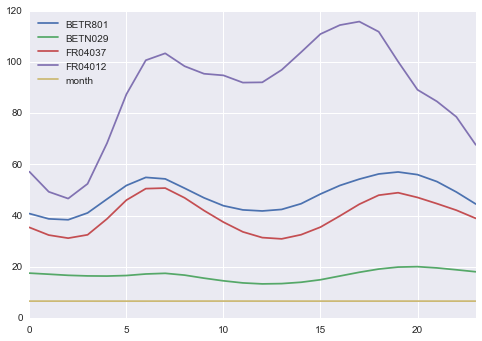

In [88]:
no2.groupby(no2.index.hour).mean().plot()

#### Question: What is the difference in the typical diurnal profile between week and weekend days.

In [89]:
no2.index.weekday?

In [90]:
no2['weekday'] = no2.index.weekday

Add a column indicating week/weekend

In [91]:
no2['weekend'] = no2['weekday'].isin([5, 6])

In [92]:
data_weekend = no2.groupby(['weekend', no2.index.hour]).mean()
data_weekend.head()

BETR801    BETN029    FR04037    FR04012     month   weekday
weekend                                                                  
False   0  40.008066  17.487512  34.439398  52.094663  6.520355  1.998157
        1  38.281875  17.162671  31.585121  44.721629  6.518121  1.997315
        2  38.601189  16.800076  30.865143  43.518539  6.520511  2.000000
        3  42.633946  16.591031  32.963500  51.942135  6.518038  2.002360
        4  49.853566  16.791971  40.780162  72.547472  6.514098  2.003883

In [93]:
data_weekend_FR04012 = data_weekend['FR04012'].unstack(level=0)
data_weekend_FR04012.head()

weekend,False,True
0,52.094663,69.817219
1,44.721629,60.697248
2,43.518539,54.407904
3,51.942135,53.534933
4,72.547472,57.472830


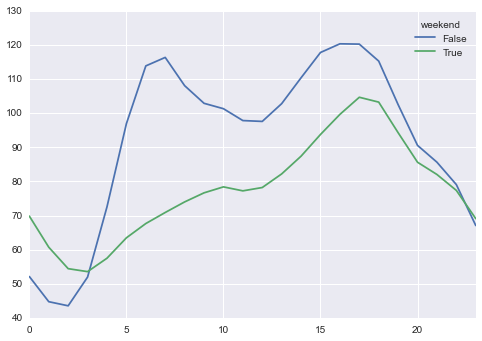

In [94]:
data_weekend_FR04012.plot()

#### Question: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?

In [95]:
exceedances = no2 > 200

In [96]:
# group by year and count exceedances (sum of boolean)
exceedances = exceedances.groupby(exceedances.index.year).sum()

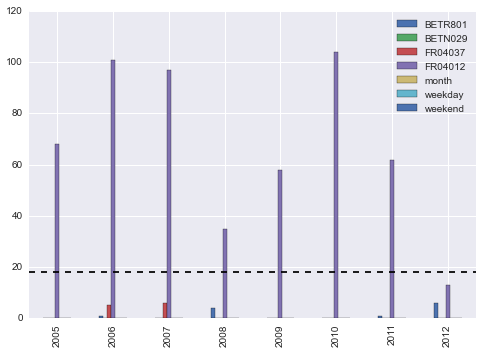

In [97]:
ax = exceedances.loc[2005:].plot(kind='bar')
ax.axhline(18, color='k', linestyle='--')

#### Question:  Visualize the typical week profile for the different stations as boxplots.

Tip: the boxplot method of a DataFrame expects the data for the different boxes in different columns)

In [98]:
# add a weekday and week column
no2['weekday'] = no2.index.weekday
no2['week'] = no2.index.week
no2.head()

,BETR801,BETN029,FR04037,FR04012,month,weekday,weekend,week
1990-01-01 00:00:00,NaN,16,NaN,NaN,1,0,False,1
1990-01-01 01:00:00,NaN,18,NaN,NaN,1,0,False,1
1990-01-01 02:00:00,NaN,21,NaN,NaN,1,0,False,1
1990-01-01 03:00:00,NaN,26,NaN,NaN,1,0,False,1
1990-01-01 04:00:00,NaN,21,NaN,NaN,1,0,False,1


In [99]:
# pivot table so that the weekdays are the different columns
data_pivoted = no2['2012'].pivot_table(columns='weekday', index='week', values='FR04037')
data_pivoted.head()

weekday,0,1,2,3,4,5,6
week,,,,,,,
1,24.625000,23.875000,26.208333,17.500000,40.208333,24.625000,22.375000
2,39.125000,44.125000,57.583333,50.750000,40.791667,34.750000,32.250000
3,45.208333,66.333333,51.958333,28.250000,28.291667,18.416667,18.333333
4,35.333333,49.500000,49.375000,48.916667,63.458333,34.250000,25.250000
5,47.791667,38.791667,54.333333,50.041667,51.458333,46.541667,35.458333


/home/joris/miniconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


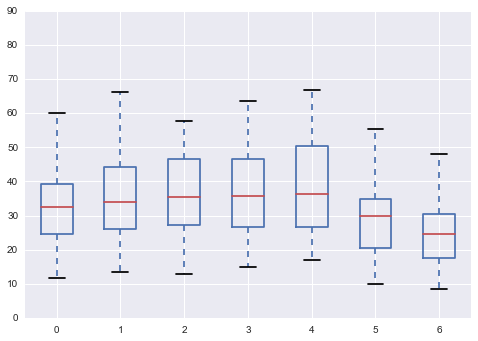

In [100]:
box = data_pivoted.boxplot()

**Exercise**: Calculate the correlation between the different stations

In [101]:
no2[['BETR801', 'BETN029', 'FR04037', 'FR04012']].corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.464085,0.561676,0.394446
BETN029,0.464085,1.000000,0.401864,0.186997
FR04037,0.561676,0.401864,1.000000,0.433466
FR04012,0.394446,0.186997,0.433466,1.000000


In [102]:
no2[['BETR801', 'BETN029', 'FR04037', 'FR04012']].resample('D').corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.581701,0.663855,0.459885
BETN029,0.581701,1.000000,0.527390,0.312484
FR04037,0.663855,0.527390,1.000000,0.453584
FR04012,0.459885,0.312484,0.453584,1.000000


In [103]:
no2 = no2[['BETR801', 'BETN029', 'FR04037', 'FR04012']]

# 8. What I didn't talk about

- Concatenating data: `pd.concat`
- Merging and joining data: `pd.merge`
- Working with missing data: `isnull`, `dropna`, `interpolate`, ...
- ...
